<a href="https://colab.research.google.com/github/SalmanRadhitya/UTS-Machine-Learning/blob/main/UTS_Machine_Learning_Prediksi_Data_Quality_Wine_4112322014.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**NAMA : Muhammad Salman Radhitya**

**NIM: 4112322014**

**Staterkom 2022**

## Melakukan Preprocessing

In [143]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

melakukan import data csv

In [144]:
dataset = pd.read_csv("/content/data_training.csv")

melakukan cek data dengan data yang ditampilkan adalah 5 teratas

In [145]:
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.3,0.740,0.08,1.7,0.094,10.0,45.0,0.99576,3.24,0.50,9.8,5,1366
1,8.1,0.575,0.22,2.1,0.077,12.0,65.0,0.99670,3.29,0.51,9.2,5,103
2,10.1,0.430,0.40,2.6,0.092,13.0,52.0,0.99834,3.22,0.64,10.0,7,942
3,12.9,0.500,0.55,2.8,0.072,7.0,24.0,1.00012,3.09,0.68,10.9,6,811
4,8.4,0.360,0.32,2.2,0.081,32.0,79.0,0.99640,3.30,0.72,11.0,6,918


In [146]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 857 entries, 0 to 856
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         857 non-null    float64
 1   volatile acidity      857 non-null    float64
 2   citric acid           857 non-null    float64
 3   residual sugar        857 non-null    float64
 4   chlorides             857 non-null    float64
 5   free sulfur dioxide   857 non-null    float64
 6   total sulfur dioxide  857 non-null    float64
 7   density               857 non-null    float64
 8   pH                    857 non-null    float64
 9   sulphates             857 non-null    float64
 10  alcohol               857 non-null    float64
 11  quality               857 non-null    int64  
 12  Id                    857 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 87.2 KB


melakukan cek data missing value dan type datanya, karena tidak ada data yang missing value dan tipe datanya benar maka langsu lanjut ke proses selanjutnya

In [147]:
dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000
mean,8.261960,0.529393,0.267351,2.506184,0.086830,15.782964,45.978413,0.996692,3.313092,0.656709,10.430338,5.653442,813.749125
std,1.701992,0.179162,0.195144,1.293512,0.048721,10.300402,31.692113,0.001901,0.152079,0.167364,1.066971,0.821777,463.807063
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.390000,8.400000,3.000000,0.000000
25%,7.100000,0.395000,0.090000,1.900000,0.070000,7.000000,21.000000,0.995520,3.210000,0.550000,9.500000,5.000000,413.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,14.000000,38.000000,0.996680,3.310000,0.620000,10.200000,6.000000,814.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,63.000000,0.997800,3.400000,0.730000,11.100000,6.000000,1214.000000
max,15.600000,1.580000,1.000000,15.500000,0.611000,68.000000,278.000000,1.003200,4.010000,2.000000,14.000000,8.000000,1597.000000


quality
5    362
6    341
7    109
4     26
8     13
3      6
Name: count, dtype: int64


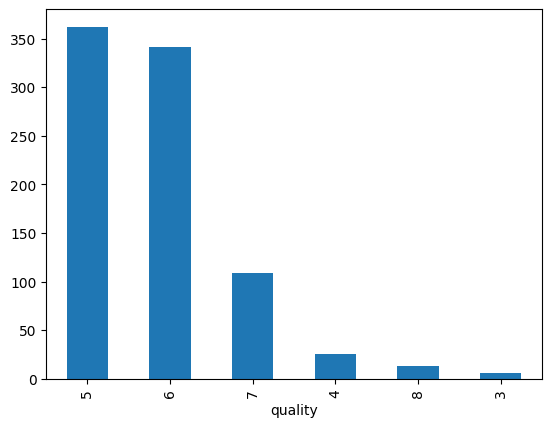

In [148]:
print(dataset.quality.value_counts())
dataset.quality.value_counts().plot(kind='bar')
plt.show()

Kode tersebut digunakan untuk menganalisis distribusi nilai pada kolom quality dalam sebuah dataset. Baris pertama, `print(dataset.quality.value_counts())`, digunakan untuk menghitung dan menampilkan frekuensi kemunculan masing-masing nilai unik dalam kolom quality. Ini berguna untuk mengetahui seberapa sering setiap tingkat kualitas muncul dalam data. Selanjutnya, baris `dataset.quality.value_counts().plot(kind='bar')` membuat visualisasi dalam bentuk grafik batang berdasarkan frekuensi yang telah dihitung sebelumnya, sehingga pola distribusi kualitas dapat dilihat secara lebih jelas dan cepat dipahami. Terakhir, `plt.show()` digunakan untuk menampilkan grafik tersebut ke layar. Kombinasi kode ini sangat berguna dalam eksplorasi awal data untuk memahami sebaran kategori pada kolom tertentu.

In [149]:
#Memeriksa nilai unik dalam variabel target
dataset["quality"].unique()

array([5, 7, 6, 4, 8, 3])

In [150]:
#Sekarang kita harus memeriksa jumlah nilai dalam variabel target.
dataset["quality"].value_counts(normalize = True)

,proportion
quality,
5,0.422404
6,0.397900
7,0.127188
4,0.030338
8,0.015169
3,0.007001


In [151]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

In [152]:
scaler = MinMaxScaler()

min_max_df = scaler.fit_transform(dataset.drop("quality", axis = 1))
min_max_df = pd.DataFrame(min_max_df, columns = dataset.columns[:-1])

Kode tersebut digunakan untuk menormalisasi data (mengubah skala data ke rentang 0 sampai 1) menggunakan MinMaxScaler dari sklearn. Pertama, kolom `quality` dihapus karena tidak perlu dinormalisasi. Kemudian, data yang tersisa diproses dengan `MinMaxScaler` agar semua nilainya berada dalam skala yang sama. Hasilnya disimpan dalam DataFrame baru bernama `min_max_df`. Normalisasi ini penting agar model machine learning bisa bekerja lebih baik.

In [153]:
#kerangka data yang dinormalisasi
min_max_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.245455,0.424658,0.08,0.054795,0.136895,0.134328,0.143382,0.433359,0.393701,0.068323,0.250000,0.855354
1,0.318182,0.311644,0.22,0.082192,0.108514,0.164179,0.216912,0.504950,0.433071,0.074534,0.142857,0.064496
2,0.500000,0.212329,0.40,0.116438,0.133556,0.179104,0.169118,0.629855,0.377953,0.155280,0.285714,0.589856
3,0.754545,0.260274,0.55,0.130137,0.100167,0.089552,0.066176,0.765423,0.275591,0.180124,0.446429,0.507827
4,0.345455,0.164384,0.32,0.089041,0.115192,0.462687,0.268382,0.482102,0.440945,0.204969,0.464286,0.574828


Kode min_max_df.head() digunakan untuk menampilkan 5 baris pertama dari kerangka data (DataFrame) yang telah dinormalisasi menggunakan Min-Max Scaling. Ini berguna untuk memastikan bahwa proses normalisasi berhasil dan semua nilai berada dalam rentang antara 0 dan 1. Dengan melihat hasil ini, kita bisa memeriksa apakah data sudah siap digunakan untuk pelatihan model machine learning.

In [154]:
X = min_max_df
y = dataset['quality']

In [155]:
from imblearn.over_sampling import SMOTE

In [156]:
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [157]:
X.shape, y.shape

((2172, 12), (2172,))

In [158]:
y.value_counts()

,count
quality,
5,362
7,362
6,362
4,362
8,362
3,362


In [159]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

`train_test_split(X, y, test_size=0.33, random_state=42)` membagi data fitur (X) dan label/target (y) menjadi dua bagian:

X_train dan y_train: data untuk melatih model (67% dari total data)

X_test dan y_test: data untuk menguji model (33% dari total data)

`Parameter test_size=0.33` artinya 33% dari data digunakan untuk pengujian.
`random_state=42` digunakan agar pembagian data selalu sama setiap kali dijalankan (hasilnya konsisten).

In [160]:
# saya akan mencoba beberapa model dan kemudian saya akan menulis fungsi yang membuat prosesnya sedikit lebih mudah
def run_model(model):
  model.fit(X_train, y_train)
  preds = model.predict(X_test)
  print(confusion_matrix(y_test, preds))
  print("\n")
  print("---"*10)
  print("\n")
  print("Accuracy Score is: ", accuracy_score(y_test,preds))

Fungsi `run_model(model)` dibuat untuk menyederhanakan proses menjalankan dan mengevaluasi model. Di dalamnya, model yang diberikan akan dilatih menggunakan data latih (`X_train` dan `y_train`). Setelah itu, model digunakan untuk memprediksi hasil dari data uji (`X_test`). Hasil prediksi tersebut dibandingkan dengan data sebenarnya (`y_test`) dan ditampilkan dalam bentuk confusion matrix, yaitu tabel yang menunjukkan jumlah prediksi yang benar dan salah. Kemudian, fungsi ini juga menampilkan skor akurasi, yaitu seberapa akurat model dalam memprediksi data uji. Fungsi ini sangat membantu untuk mencoba beberapa model secara cepat tanpa harus menulis kode evaluasi berulang-ulang.

In [161]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

In [162]:
def run_model(model, model_name):
  model.fit(X_train, y_train)
  preds = model.predict(X_test)
  print(f"--- Results for {model_name} ---")
  print(classification_report(y_test, preds))
  print("---"*10)

# Example usage (assuming X_train, y_train, X_test, y_test are defined)
models = {
    "SVC": SVC(),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(criterion='entropy', random_state=0),
    "Gaussian Naive Bayes": GaussianNB(),
}
for model_name, model in models.items():
  run_model(model, model_name)

--- Results for SVC ---
              precision    recall  f1-score   support

           3       0.89      1.00      0.94       119
           4       0.63      0.85      0.72       107
           5       0.58      0.46      0.51       116
           6       0.53      0.37      0.43       120
           7       0.74      0.57      0.64       139
           8       0.72      0.97      0.82       116

    accuracy                           0.70       717
   macro avg       0.68      0.70      0.68       717
weighted avg       0.68      0.70      0.68       717

------------------------------
--- Results for KNN ---
              precision    recall  f1-score   support

           3       0.94      1.00      0.97       119
           4       0.73      1.00      0.84       107
           5       0.62      0.47      0.53       116
           6       0.54      0.32      0.40       120
           7       0.74      0.78      0.76       139
           8       0.83      0.99      0.90       116

Fungsi `run_model(model, model_name)` digunakan untuk melatih dan mengevaluasi sebuah model machine learning. Di dalam fungsi, model akan dilatih menggunakan data latih (`X_train` dan `y_train`), kemudian digunakan untuk memprediksi hasil dari data uji (`X_test`). Setelah itu, ditampilkan laporan klasifikasi (`classification_report`) yang mencakup metrik evaluasi seperti **precision**, **recall**, **f1-score**, dan **accuracy** untuk masing-masing kelas. Nama model juga ditampilkan agar hasilnya mudah dibedakan.

Selanjutnya, beberapa model machine learning seperti **SVC (Support Vector Machine)**, **KNN**, **Decision Tree**, dan **Gaussian Naive Bayes** disimpan dalam sebuah dictionary bernama `models`. Dengan menggunakan perulangan `for`, setiap model dalam dictionary akan dijalankan satu per satu melalui fungsi `run_model`, sehingga kamu bisa membandingkan kinerja beberapa model secara praktis dan efisien.

In [163]:
# Membagi dataset ke sumbu X dan y
X=dataset.iloc[: , 0:11].values
y=dataset.iloc[: ,-2].values

In [164]:
X

array([[ 7.3  ,  0.74 ,  0.08 , ...,  3.24 ,  0.5  ,  9.8  ],
       [ 8.1  ,  0.575,  0.22 , ...,  3.29 ,  0.51 ,  9.2  ],
       [10.1  ,  0.43 ,  0.4  , ...,  3.22 ,  0.64 , 10.   ],
       ...,
       [ 7.4  ,  0.35 ,  0.33 , ...,  3.36 ,  0.6  , 11.9  ],
       [ 7.9  ,  0.57 ,  0.31 , ...,  3.29 ,  0.69 ,  9.5  ],
       [ 7.5  ,  0.52 ,  0.4  , ...,  3.26 ,  0.64 , 11.8  ]])

In [165]:
y

array([5, 5, 7, 6, 6, 5, 7, 6, 6, 6, 7, 5, 6, 6, 5, 5, 6, 5, 4, 6, 7, 6,
       6, 6, 6, 7, 6, 5, 5, 5, 6, 5, 5, 6, 6, 5, 5, 5, 5, 6, 7, 5, 6, 6,
       6, 5, 5, 7, 5, 4, 8, 6, 5, 6, 6, 5, 6, 5, 5, 3, 6, 5, 5, 7, 5, 5,
       6, 6, 7, 5, 6, 6, 7, 6, 6, 5, 7, 6, 6, 6, 7, 5, 6, 5, 5, 6, 5, 5,
       5, 5, 8, 7, 6, 4, 5, 6, 7, 5, 6, 7, 6, 6, 5, 6, 5, 6, 5, 5, 6, 6,
       5, 8, 6, 6, 5, 5, 4, 6, 5, 5, 6, 5, 5, 6, 7, 5, 6, 7, 7, 5, 6, 4,
       4, 6, 5, 6, 7, 6, 6, 5, 6, 5, 6, 6, 5, 6, 5, 5, 7, 6, 5, 5, 5, 4,
       6, 6, 6, 6, 6, 6, 7, 3, 5, 5, 5, 5, 5, 5, 5, 3, 5, 6, 6, 7, 5, 5,
       6, 5, 7, 7, 6, 6, 6, 6, 4, 5, 5, 6, 5, 5, 6, 6, 5, 6, 5, 6, 7, 5,
       7, 5, 5, 6, 6, 7, 6, 6, 6, 5, 5, 6, 6, 6, 7, 6, 6, 6, 7, 5, 5, 5,
       5, 5, 7, 7, 6, 6, 5, 6, 5, 6, 8, 6, 5, 6, 5, 6, 6, 6, 6, 5, 6, 6,
       5, 5, 5, 7, 5, 5, 6, 5, 5, 7, 5, 5, 6, 4, 4, 5, 6, 7, 6, 5, 6, 6,
       5, 6, 6, 5, 5, 6, 6, 5, 5, 5, 6, 5, 6, 6, 6, 6, 4, 6, 5, 7, 5, 5,
       5, 5, 5, 6, 5, 5, 5, 7, 5, 5, 6, 5, 5, 6, 6,

In [166]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=0)

X adalah fitur (data input), dan y adalah label/target (data output).

Data dibagi menjadi:

X_train dan y_train → 80% dari data, digunakan untuk melatih model.

X_test dan y_test → 20% dari data, digunakan untuk menguji model.

`test_size=0.2` menunjukkan bahwa 20% dari data digunakan untuk pengujian.

`random_state=0` digunakan agar pembagian data tetap konsisten setiap kali dijalankan.

In [167]:
# Skala Fitur

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


# Pemilihan model yang digunakan untuk menilai prediksi kualitas anggur

## KNN

In [168]:
# KNN:K Nearest Neighbour
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train,y_train)

KNeighborsClassifier()

In [169]:
# Training the model
y_pred=classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[5 5]
 [6 5]
 [6 6]
 [5 5]
 [6 5]
 [7 5]
 [6 7]
 [6 6]
 [6 7]
 [6 6]
 [5 5]
 [6 6]
 [6 5]
 [7 6]
 [6 5]
 [7 7]
 [5 5]
 [5 5]
 [5 5]
 [5 5]
 [5 5]
 [6 6]
 [5 5]
 [5 6]
 [5 5]
 [6 5]
 [5 6]
 [5 5]
 [6 6]
 [5 5]
 [5 6]
 [5 7]
 [5 6]
 [6 6]
 [5 6]
 [6 6]
 [6 5]
 [6 6]
 [6 5]
 [5 6]
 [6 6]
 [5 5]
 [5 7]
 [5 6]
 [6 5]
 [5 5]
 [5 5]
 [6 6]
 [5 6]
 [5 5]
 [5 5]
 [7 6]
 [5 4]
 [6 5]
 [6 7]
 [5 5]
 [5 5]
 [5 6]
 [6 6]
 [7 7]
 [7 6]
 [6 6]
 [7 6]
 [6 6]
 [6 6]
 [5 6]
 [7 7]
 [5 5]
 [6 6]
 [6 5]
 [5 5]
 [6 6]
 [6 6]
 [6 6]
 [6 5]
 [5 5]
 [5 5]
 [6 7]
 [6 5]
 [5 5]
 [6 6]
 [6 6]
 [5 5]
 [5 5]
 [7 7]
 [6 6]
 [7 6]
 [7 6]
 [4 4]
 [6 5]
 [6 6]
 [5 6]
 [6 6]
 [5 6]
 [6 6]
 [5 5]
 [5 5]
 [5 5]
 [6 7]
 [5 6]
 [5 7]
 [6 5]
 [6 6]
 [5 6]
 [6 5]
 [6 6]
 [6 5]
 [6 6]
 [5 6]
 [5 5]
 [5 5]
 [6 5]
 [6 6]
 [6 4]
 [3 5]
 [5 7]
 [5 5]
 [6 7]
 [5 5]
 [6 7]
 [7 6]
 [5 4]
 [6 6]
 [6 6]
 [7 7]
 [6 5]
 [6 5]
 [5 4]
 [6 6]
 [6 6]
 [5 5]
 [5 5]
 [6 6]
 [6 7]
 [6 6]
 [7 7]
 [6 6]
 [4 5]
 [6 5]
 [5 5]
 [5 5]
 [5 5]
 [5 5]

In [170]:
# Calculating quality for model

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 0  0  0  0  0  0]
 [ 0  1  4  1  0  0]
 [ 1  1 46 24  2  0]
 [ 0  1 20 42  7  0]
 [ 0  0  4  9  6  0]
 [ 0  0  0  2  1  0]]


0.5523255813953488

Dengan menggunakan model KNN ini memperoleh nilai prediksi kualitas anggur dengan accuracy sebesar 0,55 atau 55%

## Decision Tree

In [171]:
# Training the model
from sklearn.tree import DecisionTreeClassifier
classifier= DecisionTreeClassifier(criterion='entropy', random_state=0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [172]:
# Predicting the values
y_pred=classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[5 5]
 [5 5]
 [6 6]
 [5 5]
 [6 5]
 [5 5]
 [6 7]
 [6 6]
 [6 7]
 [6 6]
 [4 5]
 [7 6]
 [6 5]
 [6 6]
 [5 5]
 [7 7]
 [5 5]
 [5 5]
 [4 5]
 [5 5]
 [5 5]
 [6 6]
 [5 5]
 [5 6]
 [5 5]
 [6 5]
 [5 6]
 [5 5]
 [6 6]
 [5 5]
 [7 6]
 [7 7]
 [6 6]
 [6 6]
 [6 6]
 [5 6]
 [5 5]
 [6 6]
 [5 5]
 [6 6]
 [6 6]
 [5 5]
 [8 7]
 [5 6]
 [6 5]
 [5 5]
 [5 5]
 [5 6]
 [8 6]
 [5 5]
 [5 5]
 [5 6]
 [6 4]
 [6 5]
 [5 7]
 [5 5]
 [5 5]
 [5 6]
 [6 6]
 [7 7]
 [6 6]
 [6 6]
 [8 6]
 [7 6]
 [5 6]
 [5 6]
 [7 7]
 [5 5]
 [7 6]
 [4 5]
 [5 5]
 [6 6]
 [7 6]
 [5 6]
 [5 5]
 [5 5]
 [5 5]
 [6 7]
 [5 5]
 [6 5]
 [7 6]
 [5 6]
 [5 5]
 [5 5]
 [5 7]
 [7 6]
 [6 6]
 [6 6]
 [6 4]
 [7 5]
 [6 6]
 [5 6]
 [7 6]
 [6 6]
 [6 6]
 [5 5]
 [6 5]
 [5 5]
 [6 7]
 [4 6]
 [5 7]
 [5 5]
 [6 6]
 [5 6]
 [3 5]
 [6 6]
 [6 5]
 [5 6]
 [6 6]
 [5 5]
 [5 5]
 [5 5]
 [6 6]
 [3 4]
 [5 5]
 [7 7]
 [6 5]
 [7 7]
 [6 5]
 [5 7]
 [7 6]
 [5 4]
 [6 6]
 [5 6]
 [7 7]
 [6 5]
 [6 5]
 [3 4]
 [6 6]
 [6 6]
 [5 5]
 [6 5]
 [6 6]
 [6 7]
 [6 6]
 [7 7]
 [5 6]
 [5 5]
 [5 5]
 [5 5]
 [6 5]
 [6 5]
 [5 5]

In [173]:
# Calculating quality for model

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 0  0  0  0  0  0]
 [ 2  0  2  2  0  0]
 [ 1  3 52 17  1  0]
 [ 0  1 18 37 12  2]
 [ 0  0  4  6  8  1]
 [ 0  0  2  1  0  0]]


0.563953488372093

Dengan menggunakan model Decision Tree ini memperoleh nilai prediksi kualitas anggur dengan accuracy sebesar 0,56 atau 56%

## Naive Bayes

In [174]:
# Training the model
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [175]:
# Predicting the values
y_pred=classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[5 5]
 [5 5]
 [6 6]
 [5 5]
 [5 5]
 [6 5]
 [6 7]
 [6 6]
 [7 7]
 [6 6]
 [5 5]
 [6 6]
 [3 5]
 [6 6]
 [5 5]
 [7 7]
 [5 5]
 [5 5]
 [5 5]
 [6 5]
 [5 5]
 [5 6]
 [5 5]
 [5 6]
 [6 5]
 [5 5]
 [5 6]
 [5 5]
 [6 6]
 [5 5]
 [6 6]
 [6 7]
 [6 6]
 [4 6]
 [6 6]
 [6 6]
 [5 5]
 [6 6]
 [6 5]
 [6 6]
 [6 6]
 [5 5]
 [7 7]
 [6 6]
 [6 5]
 [5 5]
 [5 5]
 [5 6]
 [7 6]
 [5 5]
 [5 5]
 [6 6]
 [6 4]
 [5 5]
 [6 7]
 [7 5]
 [5 5]
 [4 6]
 [7 6]
 [7 7]
 [7 6]
 [6 6]
 [6 6]
 [6 6]
 [5 6]
 [5 6]
 [7 7]
 [5 5]
 [7 6]
 [6 5]
 [5 5]
 [6 6]
 [7 6]
 [6 6]
 [5 5]
 [5 5]
 [3 5]
 [6 7]
 [6 5]
 [5 5]
 [6 6]
 [6 6]
 [6 5]
 [5 5]
 [7 7]
 [6 6]
 [6 6]
 [7 6]
 [4 4]
 [4 5]
 [6 6]
 [6 6]
 [7 6]
 [7 6]
 [7 6]
 [5 5]
 [5 5]
 [5 5]
 [6 7]
 [5 6]
 [6 7]
 [5 5]
 [6 6]
 [6 6]
 [5 5]
 [6 6]
 [5 5]
 [6 6]
 [5 6]
 [5 5]
 [5 5]
 [5 5]
 [6 6]
 [4 4]
 [4 5]
 [6 7]
 [4 5]
 [7 7]
 [5 5]
 [6 7]
 [6 6]
 [5 4]
 [5 6]
 [6 6]
 [7 7]
 [6 5]
 [6 5]
 [6 4]
 [6 6]
 [5 6]
 [5 5]
 [6 5]
 [6 6]
 [6 7]
 [6 6]
 [7 7]
 [5 6]
 [5 5]
 [7 5]
 [5 5]
 [6 5]
 [5 5]
 [5 5]

In [176]:
# Calculating quality for model

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 0  0  0  0  0  0]
 [ 0  2  2  2  0  0]
 [ 3  3 48 16  4  0]
 [ 0  3 16 39 12  0]
 [ 0  0  0  9 10  0]
 [ 0  0  0  1  2  0]]


0.5755813953488372

Dengan menggunakan model Naive Bayes ini memperoleh nilai prediksi kualitas anggur dengan accuracy sebesar 0,57 atau 57%

## Logistic Regression

In [177]:
# Training the model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg = logreg.fit(X_train,y_train)

In [178]:
# Predicting the values
y_pred=classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[5 5]
 [5 5]
 [6 6]
 [5 5]
 [5 5]
 [6 5]
 [6 7]
 [6 6]
 [7 7]
 [6 6]
 [5 5]
 [6 6]
 [3 5]
 [6 6]
 [5 5]
 [7 7]
 [5 5]
 [5 5]
 [5 5]
 [6 5]
 [5 5]
 [5 6]
 [5 5]
 [5 6]
 [6 5]
 [5 5]
 [5 6]
 [5 5]
 [6 6]
 [5 5]
 [6 6]
 [6 7]
 [6 6]
 [4 6]
 [6 6]
 [6 6]
 [5 5]
 [6 6]
 [6 5]
 [6 6]
 [6 6]
 [5 5]
 [7 7]
 [6 6]
 [6 5]
 [5 5]
 [5 5]
 [5 6]
 [7 6]
 [5 5]
 [5 5]
 [6 6]
 [6 4]
 [5 5]
 [6 7]
 [7 5]
 [5 5]
 [4 6]
 [7 6]
 [7 7]
 [7 6]
 [6 6]
 [6 6]
 [6 6]
 [5 6]
 [5 6]
 [7 7]
 [5 5]
 [7 6]
 [6 5]
 [5 5]
 [6 6]
 [7 6]
 [6 6]
 [5 5]
 [5 5]
 [3 5]
 [6 7]
 [6 5]
 [5 5]
 [6 6]
 [6 6]
 [6 5]
 [5 5]
 [7 7]
 [6 6]
 [6 6]
 [7 6]
 [4 4]
 [4 5]
 [6 6]
 [6 6]
 [7 6]
 [7 6]
 [7 6]
 [5 5]
 [5 5]
 [5 5]
 [6 7]
 [5 6]
 [6 7]
 [5 5]
 [6 6]
 [6 6]
 [5 5]
 [6 6]
 [5 5]
 [6 6]
 [5 6]
 [5 5]
 [5 5]
 [5 5]
 [6 6]
 [4 4]
 [4 5]
 [6 7]
 [4 5]
 [7 7]
 [5 5]
 [6 7]
 [6 6]
 [5 4]
 [5 6]
 [6 6]
 [7 7]
 [6 5]
 [6 5]
 [6 4]
 [6 6]
 [5 6]
 [5 5]
 [6 5]
 [6 6]
 [6 7]
 [6 6]
 [7 7]
 [5 6]
 [5 5]
 [7 5]
 [5 5]
 [6 5]
 [5 5]
 [5 5]

In [179]:
# Calculating quality for model

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 0  0  0  0  0  0]
 [ 0  2  2  2  0  0]
 [ 3  3 48 16  4  0]
 [ 0  3 16 39 12  0]
 [ 0  0  0  9 10  0]
 [ 0  0  0  1  2  0]]


0.5755813953488372

Dengan menggunakan model Logistic Regression ini memperoleh nilai prediksi kualitas anggur dengan accuracy sebesar 0,57 atau 57%

## SVC

In [180]:
# Training the model
from sklearn.svm import SVC
classifier = SVC(kernel='rbf', random_state = 1)
classifier.fit(X_train,y_train)

SVC(random_state=1)

In [181]:
# Predicting the values
y_pred=classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))
final_classifier = classifier    # since max quality is for SVM so we have stored this in a final variable

[[5 5]
 [5 5]
 [6 6]
 [5 5]
 [5 5]
 [6 5]
 [6 7]
 [6 6]
 [6 7]
 [6 6]
 [5 5]
 [6 6]
 [5 5]
 [5 6]
 [5 5]
 [7 7]
 [5 5]
 [5 5]
 [5 5]
 [5 5]
 [5 5]
 [6 6]
 [5 5]
 [5 6]
 [5 5]
 [5 5]
 [5 6]
 [5 5]
 [6 6]
 [5 5]
 [6 6]
 [6 7]
 [6 6]
 [6 6]
 [6 6]
 [6 6]
 [5 5]
 [6 6]
 [5 5]
 [6 6]
 [6 6]
 [5 5]
 [7 7]
 [6 6]
 [6 5]
 [5 5]
 [5 5]
 [6 6]
 [5 6]
 [5 5]
 [5 5]
 [6 6]
 [5 4]
 [5 5]
 [6 7]
 [5 5]
 [5 5]
 [5 6]
 [6 6]
 [7 7]
 [6 6]
 [6 6]
 [6 6]
 [6 6]
 [5 6]
 [5 6]
 [6 7]
 [5 5]
 [6 6]
 [6 5]
 [5 5]
 [5 6]
 [6 6]
 [6 6]
 [5 5]
 [5 5]
 [5 5]
 [6 7]
 [6 5]
 [5 5]
 [6 6]
 [6 6]
 [5 5]
 [5 5]
 [7 7]
 [6 6]
 [6 6]
 [7 6]
 [5 4]
 [5 5]
 [5 6]
 [6 6]
 [6 6]
 [6 6]
 [6 6]
 [5 5]
 [5 5]
 [5 5]
 [6 7]
 [5 6]
 [6 7]
 [5 5]
 [6 6]
 [5 6]
 [5 5]
 [6 6]
 [6 5]
 [6 6]
 [6 6]
 [5 5]
 [5 5]
 [5 5]
 [5 6]
 [5 4]
 [5 5]
 [6 7]
 [6 5]
 [6 7]
 [5 5]
 [6 7]
 [6 6]
 [5 4]
 [5 6]
 [6 6]
 [7 7]
 [6 5]
 [6 5]
 [5 4]
 [6 6]
 [5 6]
 [5 5]
 [6 5]
 [6 6]
 [6 7]
 [6 6]
 [6 7]
 [6 6]
 [5 5]
 [5 5]
 [5 5]
 [6 5]
 [5 5]
 [5 5]

In [182]:
# Calculating quality for model

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 0  6  0  0  0]
 [ 0 59 15  0  0]
 [ 0 20 47  3  0]
 [ 0  0 13  6  0]
 [ 0  0  3  0  0]]


0.6511627906976745

Dengan menggunakan model SVC(Support Vector Classification) ini memperoleh nilai prediksi kualitas anggur dengan accuracy sebesar 0,65 atau 65%

Jadi, dari hasil accuracy 5 model yang digunakan yang paling terbaik dalam memprediksi nilai prediksi kualitas anggura adalah model SVC (Support Vector Classification) dengan nilai accuracy sebesar 0,65 atau 65%

# Inputkan data testingnya


In [183]:
# In this case maximum quality is for SVM so we will use this algorithm

fin_test_data = pd.read_csv('/content/data_testing.csv')
test_data = fin_test_data.drop('Id',axis=1)
test_data = sc.fit_transform(test_data)

In [184]:
final_pred = final_classifier.predict(test_data)
final_pred

array([5, 5, 5, 5, 6, 6, 5, 5, 6, 5, 7, 6, 5, 6, 6, 5, 5, 6, 5, 6, 6, 7,
       5, 7, 5, 5, 6, 6, 5, 6, 6, 6, 7, 6, 5, 5, 5, 6, 7, 5, 7, 5, 7, 5,
       5, 5, 5, 6, 5, 6, 7, 5, 6, 6, 6, 6, 6, 6, 6, 5, 5, 6, 6, 7, 6, 5,
       7, 5, 5, 6, 6, 6, 5, 6, 5, 5, 6, 6, 5, 6, 5, 6, 6, 5, 5, 6, 5, 5,
       6, 5, 5, 6, 5, 5, 5, 5, 5, 5, 6, 5, 6, 6, 5, 6, 5, 5, 6, 6, 6, 7,
       6, 5, 5, 6, 5, 5, 6, 6, 6, 5, 5, 5, 5, 6, 5, 6, 6, 6, 5, 6, 5, 5,
       7, 6, 5, 5, 5, 5, 6, 6, 7, 5, 6, 5, 6, 5, 5, 5, 5, 5, 7, 5, 6, 5,
       6, 5, 5, 5, 6, 6, 6, 5, 6, 6, 6, 5, 6, 6, 6, 5, 6, 6, 6, 5, 5, 5,
       7, 6, 6, 5, 6, 5, 6, 5, 5, 5, 6, 5, 6, 6, 6, 6, 6, 5, 6, 6, 5, 6,
       7, 6, 6, 6, 5, 5, 6, 5, 5, 5, 6, 6, 5, 6, 5, 6, 5, 5, 6, 5, 6, 5,
       6, 6, 5, 6, 5, 6, 5, 6, 6, 6, 7, 6, 5, 5, 6, 7, 5, 6, 5, 5, 6, 6,
       6, 5, 6, 6, 5, 6, 7, 5, 5, 5, 6, 5, 5, 6, 6, 6, 5, 5, 6, 6, 7, 6,
       5, 5, 5, 6, 5, 6, 5, 7, 5, 6, 5, 6, 5, 5, 5, 5, 5, 7, 5, 5, 6, 7])

In [185]:
sample_submit = pd.read_csv('/content/hasilprediksi_3digitNIMterakhir.csv')
sample_submit

,Id;Quality
0,222;
1,1514;
2,417;
3,754;
4,516;
...,...
281,1147;
282,296;
283,170;
284,1439;


In [186]:
output = pd.DataFrame({'Id':fin_test_data.Id,'target':final_pred})
output.to_csv('hasilprediksi_014.csv', index=False)
filename = "hasilprediksi_014.csv"
print("Your submission was successfully saved!")

Your submission was successfully saved!
